## example linear regression

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
sns.load_dataset("penguins")
pd.options.display.max_rows = 10

In [19]:
p_df = sns.load_dataset("penguins")

In [20]:
#we are using flippler_lenght to predict body_mass_g
p_df = p_df.dropna()

In [21]:
p_df = p_df.reset_index()
p_df.head()

,index,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [26]:
X = p_df["flipper_length_mm"]
y = p_df["body_mass_g"]
y

0      3750.0
1      3800.0
2      3250.0
3      3450.0
4      3650.0
        ...  
328    4925.0
329    4850.0
330    5750.0
331    5200.0
332    5400.0
Name: body_mass_g, Length: 333, dtype: float64

## train-test-split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state = 42)

## model generation

In [24]:
from sklearn.linear_model import LinearRegression

In [27]:
X_train = np.array(X_train).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)

In [30]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)
model.coef_

array([[51.32743793]])

In [32]:
model.intercept_

array([-6118.66754338])

In [35]:
y_test

25     3250.0
309    4875.0
73     4000.0
195    3675.0
57     4050.0
        ...  
15     3400.0
6      4675.0
209    4000.0
93     4100.0
30     4150.0
Name: body_mass_g, Length: 100, dtype: float64

In [40]:
X_test = np.array(X_test).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

In [41]:
y_pred = model.predict(X_test)
y_test - y_pred

array([[ 232.38359244],
       [-401.02367633],
       [ 109.81714769],
       [-369.16516609],
       [ 313.79946147],
       [ -12.74929707],
       [ 222.64888574],
       [-290.18285231],
       [ -12.52797646],
       [-248.14747987],
       [ 758.48970976],
       [ 355.83483391],
       [  17.56045464],
       [-287.52797646],
       [-260.09442121],
       [  23.09152695],
       [-329.5633489 ],
       [-236.20053853],
       [ 320.4366511 ],
       [-465.40417292],
       [ 133.48970976],
       [  91.45433732],
       [ -83.98830389],
       [-250.80235573],
       [ 453.40127866],
       [-630.89078683],
       [ 285.92326501],
       [-164.07673499],
       [ 528.40127866],
       [ 314.68425818],
       [-579.5633489 ],
       [-136.64317975],
       [ 405.83483391],
       [-699.4749178 ],
       [  13.35682025],
       [  -8.76698329],
       [ -40.18285231],
       [-607.43954536],
       [-183.54566268],
       [-378.23591097],
       [ 128.40127866],
       [-183.545

In [49]:
compare = pd.DataFrame({"y_test":list(y_test), "y_pred" : list(y_pred)})
compare

,y_test,y_pred
0,[3250.0],[3017.616407560008]
1,[4875.0],[5276.023676332345]
2,[4000.0],[3890.182852312955]
3,[3675.0],[4044.1651660928874]
4,[4050.0],[3736.200538533025]
...,...,...
95,[3400.0],[2812.306655853432]
96,[4675.0],[3890.182852312955]
97,[4000.0],[4506.112107432684]
98,[4100.0],[3736.200538533025]


#### Model evaluation

In [51]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse

In [53]:
mse(y_test,y_pred)

138931.09920252106

In [54]:
#300 gr error
mae(y_test,y_pred)

299.39047755852704

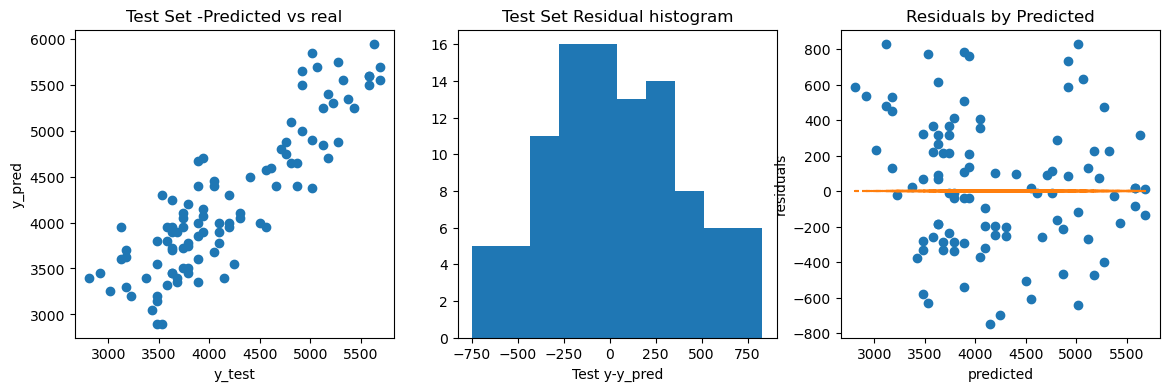

In [55]:
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscedasticity
# Does it resemble a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

In [ ]:
df = 